# Titanic 
- https://www.kaggle.com/ialimustufa/titanic-beginner-s-guide-with-sklearn

# 1. Import Libraries and Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

# 2. Loading and Viewing Data Set

In [2]:
df_train = pd.read_csv("./titanic/train.csv")
df_test = pd.read_csv("./titanic/test.csv")

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.describe() # 숫자형인 변수의 정보

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_train.info() # 모든 변수의 간단한 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# 변수들의 이름
print(df_train.keys())
print(df_test.keys())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


# 3. Dealing with NaN Values(Impuation)

In [7]:
# train, test에 null값이 몇 개 있는지 확인
def null_table(train, test):
    print("Train Data Frame")
    print(pd.isnull(train).sum())
    print("")
    print("Test Data Fram")
    print(pd.isnull(test).sum())
    
null_table(df_train, df_test)

Train Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Test Data Fram
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [8]:
# null값이 있는 Cabin, Ticket 변수 제거
df_train.drop(labels = ['Cabin', 'Ticket'], axis = 1, inplace = True)
df_test.drop(labels = ['Cabin', 'Ticket'], axis = 1, inplace = True)

null_table(df_train, df_test)

Train Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

Test Data Fram
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


Train Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

Test Data Fram
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64
Train Data Frame
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

Test Data Fram
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


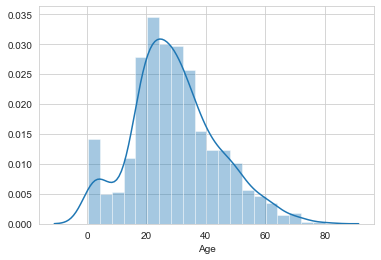

In [9]:
# df_train을 복사해서 null 값을 지운다.
copy = df_train.copy()
null_table(copy, df_test)

copy.dropna(inplace=True)
sns.distplot(copy['Age'])

null_table(copy, df_test)

In [10]:
# df_train, df_test의 Age변수에 null 값을 중간값으로 채우겠다.
df_train['Age'].fillna(df_train['Age'].median(), inplace = True)
df_test['Age'].fillna(df_test['Age'].median(), inplace = True)

# df_train의 Embarked변수에 null값을 S로 채우겠다.
df_train['Embarked'].fillna('S', inplace=True)

# df_test의 Fare변수에 null 값을 중간값으로 채우겠다.
df_test['Fare'].fillna(df_test['Fare'].median(), inplace = True)

# null 값이 있는지 확인
null_table(df_train, df_test)

Train Data Frame
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

Test Data Fram
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


# 4. Plotting and Visualizing Data

### Gender

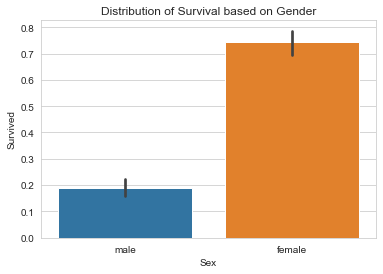

Total people survived is: 342
Proportion of Females who survived: 
0.6812865497076024
Proportion of Males who survived: 
0.31871345029239767


In [11]:
# 성별 생존 막대그래프
sns.barplot(x="Sex", y="Survived", data=df_train)
plt.title("Distribution of Survival based on Gender")
plt.show()

# 남, 여, 전체의 수
total_survived_females = df_train[df_train.Sex == "female"]['Survived'].sum()
total_survived_males = df_train[df_train.Sex == 'male']['Survived'].sum()
total_gender = total_survived_females + total_survived_males

# 남, 여의 생존률
print('Total people survived is: ' + str((total_gender)))
print('Proportion of Females who survived: ')
print(total_survived_females/total_gender)
print('Proportion of Males who survived: ')
print(total_survived_males/total_gender)

> 검은막대 : 오차막대, 오차막대를 그리는 범위는 기본적으로 ‘부트 스트랩 신뢰구간(Bootstrap confidence interval)’이라는 것을 사용한다. “이 데이터를 기반으로 유사한 상황의 95 %가이 범위 내에서 결과를 얻을 것”을 의미한다. 이 신뢰 구간은 평균(mean) 외에도 중앙값(median), 최빈값(mode) 등의 다른 값들을 함께 고려해서 계산하는 것이기 때문에 꽤나 훌륭한 수치라고 봐도 된다.

### Class

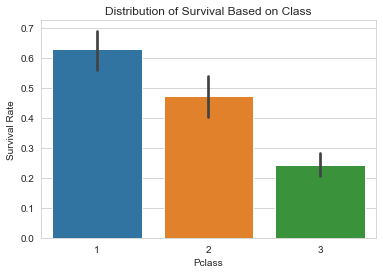

Total people survived is: 342
Proportion of Class 1 Passengers who survived:
0.39766081871345027
Proportion of Class 2 Passengers who survived:
0.2543859649122807
Proportion of Class 3 Passengers who survived:
0.347953216374269


In [12]:
# 등급별 그래프
sns.barplot(x='Pclass', y='Survived', data=df_train)
plt.ylabel('Survival Rate')
plt.title('Distribution of Survival Based on Class')
plt.show()

# 등급별 인원
total_survived_one = df_train[df_train.Pclass == 1]['Survived'].sum()
total_survived_two = df_train[df_train.Pclass == 2]['Survived'].sum()
total_survived_three = df_train[df_train.Pclass == 3]['Survived'].sum()
total_survived_class = total_survived_one + total_survived_two + total_survived_three

# 등급별 생존률
print('Total people survived is: ' + str(total_survived_class))
print('Proportion of Class 1 Passengers who survived:')
print(total_survived_one/total_survived_class)
print('Proportion of Class 2 Passengers who survived:')
print(total_survived_two/total_survived_class)
print('Proportion of Class 3 Passengers who survived:')
print(total_survived_three/total_survived_class)

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

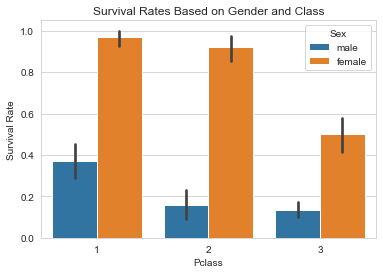

In [13]:
# 등급, 성별 막대그래프
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df_train) # hue: 다음 변수
plt.ylabel('Survival Rate')
plt.title('Survival Rates Based on Gender and Class')

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

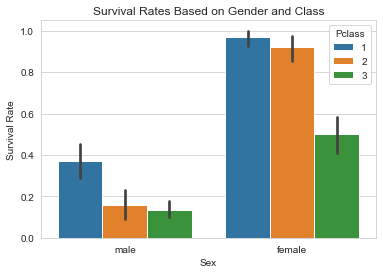

In [14]:
# 성별, 등급별 막대 그래프
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=df_train)
plt.ylabel('Survival Rate')
plt.title('Survival Rates Based on Gender and Class')

### Age

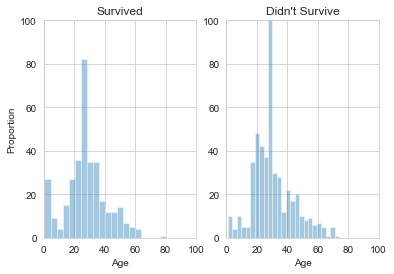

In [15]:
# 나이를 생사로 구분
survived_ages = df_train[df_train.Survived == 1]['Age']
not_survived_ages = df_train[df_train.Survived == 0]['Age']

# 생존 나이 히스토그램
plt.subplot(121)
sns.distplot(survived_ages, kde=False) # kde: 가우스 커널 밀도 추정값을 플롯할지 여부입니다
plt.axis([0,100,0,100])
plt.title('Survived')
plt.ylabel('Proportion')

# 사망 나이 시스토그램
plt.subplot(122)
sns.distplot(not_survived_ages, kde=False)
plt.axis([0,100,0,100])
plt.title("Didn't Survive")
plt.show()

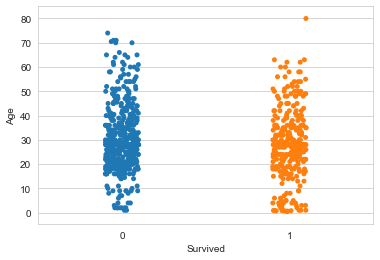

In [16]:
# 산점도로 보는 나이 분포
sns.stripplot(x='Survived', y='Age', data=df_train, jitter=True)

> jitter : 적용 할 지터의 양 (범주 축을 따라서 만). 이 방법은 점이 많고 겹치는 경우 유용하므로 분포를보다 쉽게 ​​볼 수 있습니다. 지터의 양을 지정하거나 (균일 한 랜덤 변수 지원의 절반), 기본 설정을 위해 True를 사용할 수 있습니다.

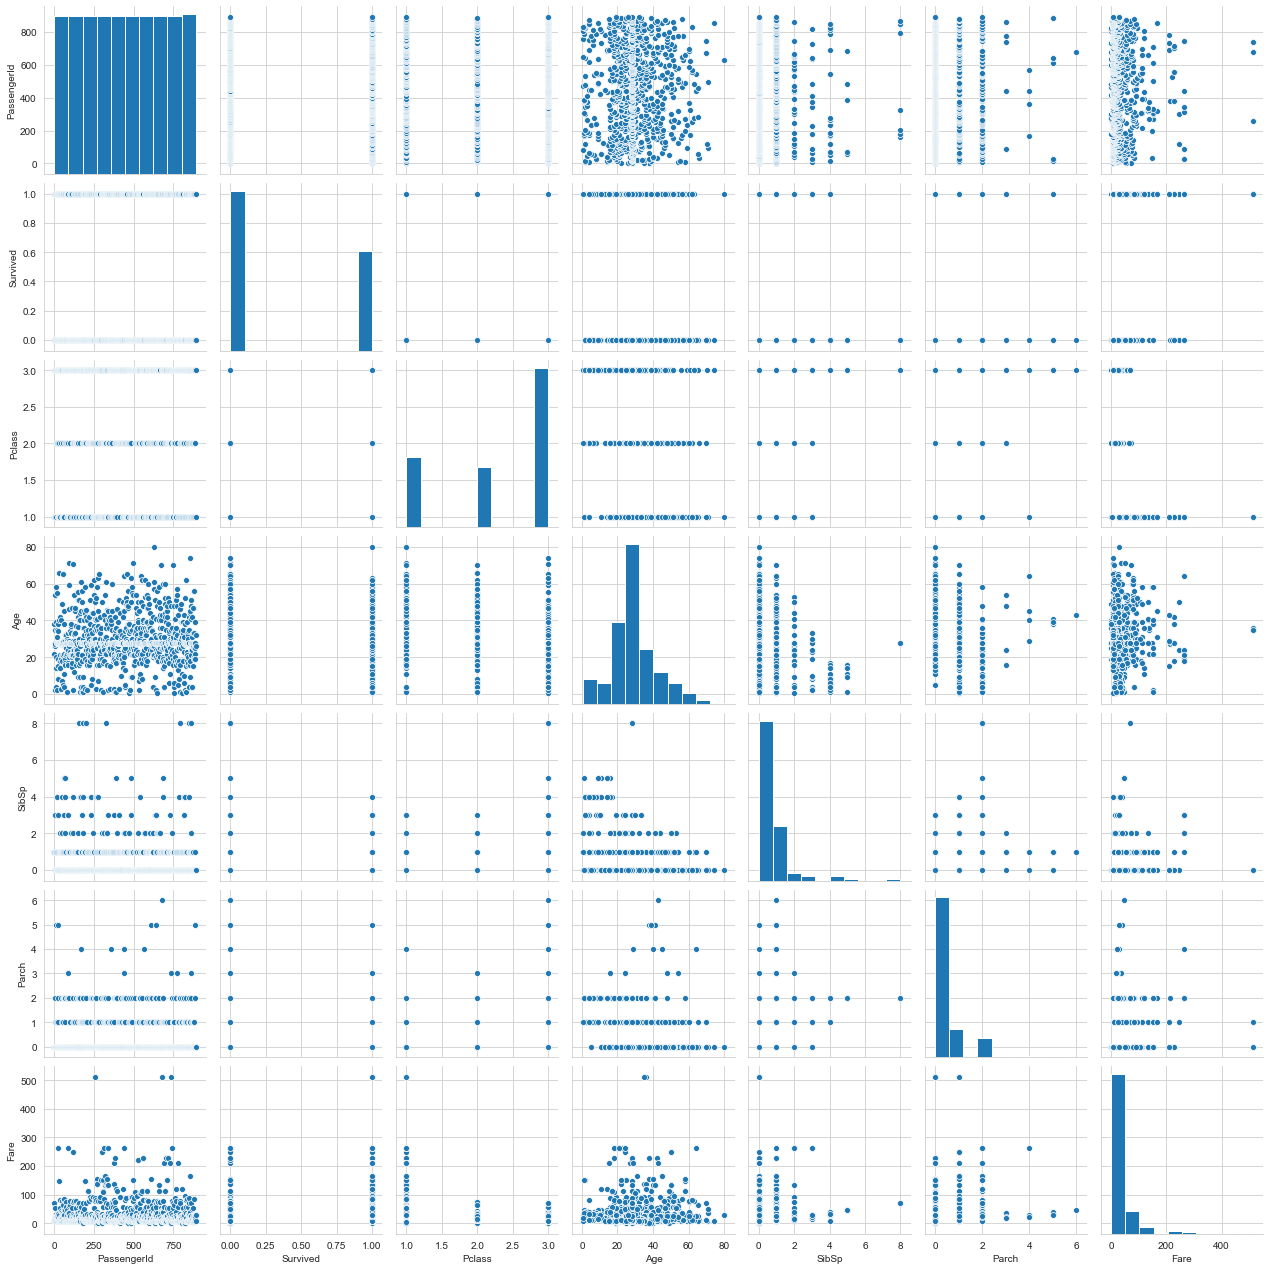

In [17]:
# 특성과 상관관계를 한번에 볼 수 있는 그래프
sns.pairplot(df_train)

# 5. Feature Engineering

In [18]:
df_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
727,728,1,3,"Mannion, Miss. Margareth",female,28.00,0,0,7.7375,Q
23,24,1,1,"Sloper, Mr. William Thompson",male,28.00,0,0,35.5000,S
670,671,1,2,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",female,40.00,1,1,39.0000,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,19.2583,C
294,295,0,3,"Mineff, Mr. Ivan",male,24.00,0,0,7.8958,S


In [19]:
df_test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
111,1003,3,"Shine, Miss. Ellen Natalia",female,27.0,0,0,7.7792,Q
15,907,2,"del Carlo, Mrs. Sebastiano (Argenia Genovesi)",female,24.0,1,0,27.7208,C
144,1036,1,"Lindeberg-Lind, Mr. Erik Gustaf (Mr Edward Lin...",male,42.0,0,0,26.5500,S
285,1177,3,"Dennis, Mr. William",male,36.0,0,0,7.2500,S
151,1043,3,"Matinoff, Mr. Nicola",male,27.0,0,0,7.8958,C


In [20]:
df_train.loc[df_train['Sex'] == "male", 'Sex'] = 0
df_train.loc[df_train['Sex'] == 'female', 'Sex'] = 1

df_train.loc[df_train['Embarked'] == 'S', 'Embarked'] = 0
df_train.loc[df_train['Embarked'] == 'C', 'Embarked'] = 1
df_train.loc[df_train['Embarked'] == 'Q', 'Embarked'] = 2

df_test.loc[df_train['Sex'] == 'male', 'Sex'] = 0
df_test.loc[df_train['Sex'] == 'female', 'Sex'] = 1

df_test.loc[df_test['Embarked'] == 'S', 'Embarked'] = 0
df_test.loc[df_test['Embarked'] == 'C', 'Embarked'] = 1
df_test.loc[df_test['Embarked'] == 'Q', 'Embarked'] = 2

In [21]:
df_test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
130,1022,3,"Spinner, Mr. Henry John",male,32.0,0,0,8.05,0
93,985,3,"Guest, Mr. Robert",male,27.0,0,0,8.05,0
338,1230,2,"Denbury, Mr. Herbert",male,25.0,0,0,31.50,0
248,1140,2,"Hold, Mrs. Stephen (Annie Margaret Hill)",female,29.0,1,0,26.00,0
383,1275,3,"McNamee, Mrs. Neal (Eileen O'Leary)",female,19.0,1,0,16.10,0


In [22]:
# 가족이 몇 명인지 새로운 변수로 나타냈다. 1을 더한 이유는 자기 자신을 의미하는 거 같다.
df_train['FamSize'] = df_train.SibSp + df_train.Parch + 1
df_test['FamSize'] = df_test.SibSp + df_test.Parch + 1

In [23]:
# 혼자인지를 판단한 변수를 하나 생성한다.
df_train['IsAlone'] = df_train.FamSize.apply(lambda x : 1 if x == 1 else 0)
df_test['IsAlone'] = df_test.FamSize.apply(lambda x : 1 if x == 1 else 0)

In [24]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0,2,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0,1,1


In [25]:
# 정규표현식으로 .앞에 글자만 뽑아낸다.
# Title이라는 변수를 생성해 넣어준다.
for name in df_train['Name']:
    df_train['Title'] = df_train['Name'].str.extract('([A-Za-z]+\.)',expand=True)

for name in df_test['Name']:
    df_test['Title'] = df_test['Name'].str.extract('([A-Za-z]+\.)',expand=True)

In [26]:
# 여러 직업?의 명칭은 Other로 바꿔준다.
title_replacements = {"Mlle.": "Other.", "Major.": "Other.", "Col.": "Other.", "Sir.": "Other.", "Don.": "Other.", "Mme.": "Other.",
          "Jonkheer.": "Other.", "Lady.": "Other.", "Capt.": "Other.", "Countess.": "Other.", "Ms.": "Other.", "Dona.": "Other.", "Rev.": "Other.", "Dr.": "Other."}

df_train.replace({"Title": title_replacements}, inplace=True)
df_test.replace({"Title": title_replacements}, inplace=True)

# 5개로 분류해준다. 
df_train.loc[df_train["Title"] == "Miss.", "Title"] = 0
df_train.loc[df_train["Title"] == "Mr.", "Title"] = 1
df_train.loc[df_train["Title"] == "Mrs.", "Title"] = 2
df_train.loc[df_train["Title"] == "Master.", "Title"] = 3
df_train.loc[df_train["Title"] == "Other.", "Title"] = 4

df_test.loc[df_test["Title"] == "Miss.", "Title"] = 0
df_test.loc[df_test["Title"] == "Mr.", "Title"] = 1
df_test.loc[df_test["Title"] == "Mrs.", "Title"] = 2
df_test.loc[df_test["Title"] == "Master.", "Title"] = 3
df_test.loc[df_test["Title"] == "Other.", "Title"] = 4

In [27]:
print(set(df_train['Title']))

{0, 1, 2, 3, 4}


In [28]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0,2,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1,2,0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0,2,0,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0,1,1,1
